In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
import skimage as ski

#Edit This
This is the part that is meant to be edited to adjust for room size and the like.

In [2]:
cube_w = 200 #Width of the room in 5 cm x
cube_l = 200 #Length of the room in 5 cm y
cube_h = 60 #Height of the room in 5 cm z

detector_distance = 40 #How far the detector can 'see' in cm

#Setup Code
This code is needed to mimick the real world, but will not go onto the robot

In [3]:
fine_room = np.zeros((cube_w, cube_l, cube_h))

In [4]:
def get_angle(source_position, robot_position):
  delta_x = source_position[0] - robot_position[0]
  delta_y = source_position[1] - robot_position[1]
  delta_z = source_position[2] - robot_position[2]

  delta = np.sqrt((delta_x ** 2) + (delta_y ** 2) + (delta_z ** 2))

  dx = delta_x / delta
  dy = delta_y / delta
  dz = delta_z / delta

  angle = (dx, dy, dz)

  return delta, angle

def run_detector(source_position, robot_position):
  distance, angle = get_angle(source_position, robot_position)
  if distance < detector_distance:
    return angle
  else:
    return (0,0,0)

#Actual Code

In [5]:
def draw_line(source_position, robot_position):
  angle = run_detector(source_position, robot_position)
  if angle == (0,0,0):
    return

  not_at_border = True
  x_position = robot_position[0]
  y_position = robot_position[1]
  z_position = robot_position[2]

  while not_at_border:
    new_x_position = x_position + angle[0]
    new_y_position = y_position + angle[1]
    new_z_position = z_position + angle[2]

    new_dV = True
    if math.ceil(new_x_position) == math.ceil(x_position):
      if math.ceil(new_y_position) == math.ceil(y_position):
        if math.ceil(new_z_position) == math.ceil(z_position):
          new_dV = False

    if new_dV:
      fine_room[math.ceil(new_x_position)][math.ceil(new_y_position)][math.ceil(new_z_position)] += 1

    x_position = new_x_position
    y_position = new_y_position
    z_position = new_z_position

    not_at_border = False
    if np.abs(x_position - cube_w/2) < cube_w/2 - 2:
      if np.abs(y_position - cube_l/2) < cube_l/2 - 2:
        if np.abs(z_position - cube_h/2) < cube_h/2 - 2:
          not_at_border = True
  return

def blur_room(room_state):
  blurred_room = room_state
  temporary_room = room_state
  for i in range(1, cube_w-1, 1):
    for j in range(1, cube_l-1, 1):
      for k in range(1, cube_h-1, 1):
        blurred_room[i,j,k] = (temporary_room[i,j,k] + temporary_room[i+1,j,k] + temporary_room[i-1,j,k] + temporary_room[i,j+1,k] + temporary_room[i,j-1,k] + temporary_room[i,j,k+1] + temporary_room[i,j,k-1]) / 7
  return blurred_room

#Testing

In [6]:
source = (100, 100, 30)
robot_1 = (80, 100, 10)
robot_2 = (100, 80, 10)
robot_3 = (120, 110, 10)
draw_line(source, robot_1)
draw_line(source, robot_2)
draw_line(source, robot_3)

In [7]:
rad_locations = np.nonzero(fine_room)
space = np.array(rad_locations)
intensities = np.zeros(len(space[0,:]))
for i in range(0, len(intensities),1):
  intensities[i] = fine_room[space[0,i], space[1,i], space[2,i]]

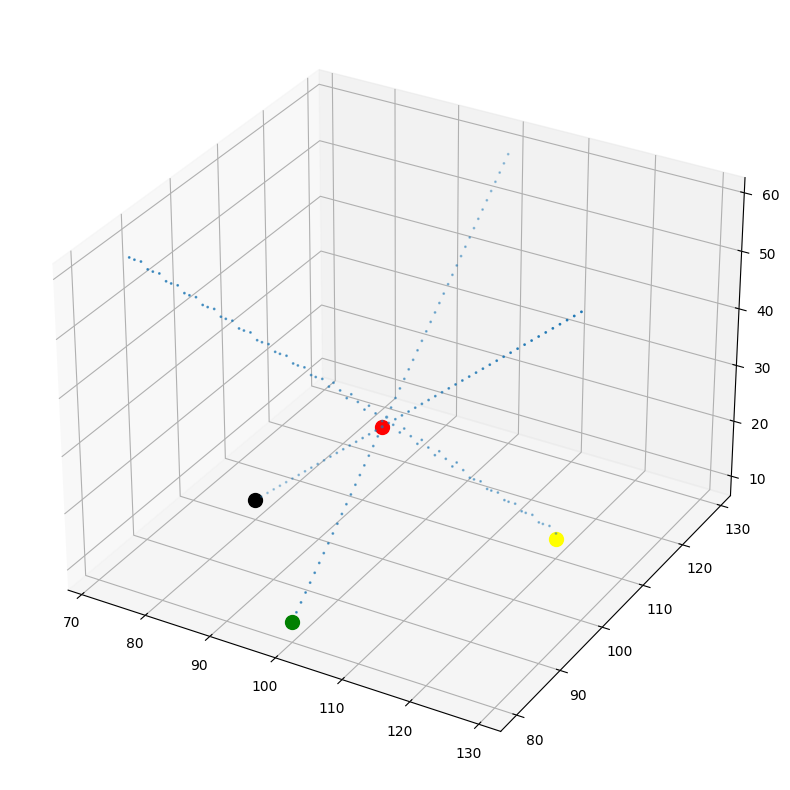

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
ax.scatter(source[0], source[1], source[2], s = 100, c = 'Red')
ax.scatter(space[0,:], space[1,:], space[2,:], s = intensities)
ax.scatter(robot_1[0], robot_1[1], robot_1[2], s = 100, c = 'Black')
ax.scatter(robot_2[0], robot_2[1], robot_2[2], s = 100, c = 'Green')
ax.scatter(robot_3[0], robot_3[1], robot_3[2], s = 100, c = 'Yellow')

In [9]:
max = -1
max_location = (-1,-1,-1)

blurred_room = blur_room(fine_room)

for i in range(0, cube_w, 1):
  for j in range(0, cube_l, 1):
    for k in range(0, cube_h, 1):
      if blurred_room[i,j,k] > max:
        max = blurred_room[i,j,k]
        max_location = [i,j,k]

print(max_location)
print(max)

[72, 86, 59]
1.0
